<a href="https://colab.research.google.com/github/yuziny/Data-Analysis/blob/main/5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 생활정보 기반 대중교통 수요 분석

버스 노선 추가가 필요한 서울시 내 자치구 선정

5. 데이터 합치기
- 버스 정류장 데이터: df_seoul_bus_station.csv
- 유동인구 데이터: df_seoul_moving.csv
- 구별 등록 인구 데이터: df_seoul_people.csv
- 구별 상권 데이터: df_seoul_business.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
standard = pd.DataFrame({'도착 시군구 코드':[11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/포트폴리오/df_seoul_bus_station.csv')
df1.head()

,자치구,정류장 개수,노선번호 개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/포트폴리오/df_seoul_moving.csv')
df2.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구평균,도착 시군구 코드.1,총 이동시간,총 이동인구
0,11010,21.349599,44.235978,11010,9356120,19385709.60
1,11020,21.012462,44.516072,11020,9306020,19715322.61
2,11030,21.364786,36.903883,11030,8514380,14707082.87
3,11040,21.740324,42.685596,11040,8887140,17449273.95
4,11050,22.474283,46.762548,11050,8625540,17947278.99


In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/포트폴리오/df_seoul_people.csv')
df3.head()

,자치구,계,남자,여자,세대당인구,65세이상고령자
0,합계,9732617,4716704,5015913,2.14,1628980
1,종로구,153684,74018,79666,1.96,28064
2,중구,131450,63869,67581,1.92,24742
3,용산구,236518,114571,121947,2.00,39461
4,성동구,291609,141662,149947,2.12,46896


In [7]:
df4 = pd.read_csv('/content/drive/MyDrive/포트폴리오/df_seoul_business.csv')
df4.head()

,자치구,동,택시운송업,한식일반음식점업 종사자수,커피전문점 종사자수,기타주점업 종사자수,일반교과학원 종사자수,한식육류요리전문점 종사자수
0,종로구,소계,215,"5,912","3,613","1,413",382,"1,982"
1,중구,소계,235,"6,414","3,542",982,175,"2,121"
2,용산구,소계,523,"2,987","2,076","1,332",573,"1,184"
3,성동구,소계,"2,527","2,785","1,859",621,"1,494","1,545"
4,광진구,소계,"1,744","2,861","1,887","1,577","1,646","1,678"


In [8]:
df5 = pd.merge(pd.merge(df1, df3), df4) # 버스정류장, 등록인구, 상권
df6 = pd.merge(df2, standard) # 유동인구
df = pd.merge(df5, df6)

In [14]:
df

,자치구,정류장 개수,노선번호 개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,계,남자,여자,...,커피전문점 종사자수,기타주점업 종사자수,일반교과학원 종사자수,한식육류요리전문점 종사자수,도착 시군구 코드,평균 이동 시간(분),이동인구평균,도착 시군구 코드.1,총 이동시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,537338,257096,280242,...,"7,273","2,528","9,020","5,008",11230,23.094565,90.226636,11230,11437560,44684651.43
1,강동구,369,21,2890053,2830506,99.161194,97.118065,465097,227891,237206,...,"1,660","1,349","2,104","1,459",11250,25.670084,64.249687,11250,8430800,21101460.33
2,강북구,413,67,4825181,4671783,133.020373,128.791504,300824,145934,154890,...,"1,095","1,275",740,"1,176",11090,23.811274,39.128470,11090,7649610,12570412.30
3,강서구,566,49,4681083,4652828,88.119480,87.587591,578426,277797,300629,...,"2,530","1,709","2,347","2,274",11160,25.124068,58.447282,11160,9388010,21839762.06
4,관악구,466,86,7655819,7792476,154.753674,157.516040,500336,250450,249886,...,"2,049","1,672","1,230","1,628",11210,23.377928,49.904036,11210,8772170,18725641.04
5,광진구,269,41,2749448,2753411,118.352546,118.523137,353110,169525,183585,...,"1,887","1,577","1,646","1,678",11050,22.474283,46.762548,11050,8625540,17947278.99
6,구로구,486,79,4942197,4730992,119.235615,114.140076,419984,208027,211957,...,"1,384","1,165","1,111","1,496",11170,22.933748,41.739382,11170,7946750,14463071.65
7,금천구,345,58,3776658,3581930,123.098370,116.751304,244901,123959,120942,...,"1,215",685,487,"1,042",11180,23.998944,30.597875,11180,6362000,8111343.74
8,노원구,514,57,4353295,4292724,88.476211,87.245168,514445,247417,267028,...,"1,748",844,"3,281","1,557",11110,24.029515,55.184590,11110,8975240,20611941.03
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,318100,154440,163660,...,837,477,"1,162",943,11100,24.489976,37.882283,11100,6995880,10821566.75


In [9]:
!pip install scipy

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [11]:
df = pd.merge(df, pd.read_csv('/content/drive/MyDrive/포트폴리오/df_seoul_people.csv'))
df

,자치구,정류장 개수,노선번호 개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,계,남자,여자,...,커피전문점 종사자수,기타주점업 종사자수,일반교과학원 종사자수,한식육류요리전문점 종사자수,도착 시군구 코드,평균 이동 시간(분),이동인구평균,도착 시군구 코드.1,총 이동시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,537338,257096,280242,...,"7,273","2,528","9,020","5,008",11230,23.094565,90.226636,11230,11437560,44684651.43
1,강동구,369,21,2890053,2830506,99.161194,97.118065,465097,227891,237206,...,"1,660","1,349","2,104","1,459",11250,25.670084,64.249687,11250,8430800,21101460.33
2,강북구,413,67,4825181,4671783,133.020373,128.791504,300824,145934,154890,...,"1,095","1,275",740,"1,176",11090,23.811274,39.128470,11090,7649610,12570412.30
3,강서구,566,49,4681083,4652828,88.119480,87.587591,578426,277797,300629,...,"2,530","1,709","2,347","2,274",11160,25.124068,58.447282,11160,9388010,21839762.06
4,관악구,466,86,7655819,7792476,154.753674,157.516040,500336,250450,249886,...,"2,049","1,672","1,230","1,628",11210,23.377928,49.904036,11210,8772170,18725641.04
5,광진구,269,41,2749448,2753411,118.352546,118.523137,353110,169525,183585,...,"1,887","1,577","1,646","1,678",11050,22.474283,46.762548,11050,8625540,17947278.99
6,구로구,486,79,4942197,4730992,119.235615,114.140076,419984,208027,211957,...,"1,384","1,165","1,111","1,496",11170,22.933748,41.739382,11170,7946750,14463071.65
7,금천구,345,58,3776658,3581930,123.098370,116.751304,244901,123959,120942,...,"1,215",685,487,"1,042",11180,23.998944,30.597875,11180,6362000,8111343.74
8,노원구,514,57,4353295,4292724,88.476211,87.245168,514445,247417,267028,...,"1,748",844,"3,281","1,557",11110,24.029515,55.184590,11110,8975240,20611941.03
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,318100,154440,163660,...,837,477,"1,162",943,11100,24.489976,37.882283,11100,6995880,10821566.75


In [12]:
df.columns

Index(['자치구', '정류장 개수', '노선번호 개수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '계', '남자', '여자', '세대당인구', '65세이상고령자', '동', '택시운송업', '한식일반음식점업 종사자수',
       '커피전문점 종사자수', '기타주점업 종사자수', '일반교과학원 종사자수', '한식육류요리전문점 종사자수',
       '도착 시군구 코드', '평균 이동 시간(분)', '이동인구평균', '도착 시군구 코드.1', '총 이동시간',
       '총 이동인구'],
      dtype='object')

# 가설 수립

**가설1 X=이동인구 -> Y=정류장(노선)의 개수**
- H0: 이동인구가 많은 자치구와 정류장(노선)의 개수는 관계가 없을 것이다.
- H1: 이동인구가 많은 자치구와 정류장(노선)의 개수는 관계가 있을 것이다.

**가설2 X=자치구 -> Y=전체인구대비 버스이용승객비율**
- H0: 자치구별 인구수와 정류장(노선)의 개수는 관계가 없을 것이다.
- H1: 자치구별 인구수와 정류장(노선)의 개수는 관계가 을 것이다.

**가설3 X=자치구 -> Y=총 버스이용 승객수 대비 정류장 개수**
- H0: 이용객 수와 정류장(노선)의 개수는 관계가 없을 것이다.
- H1: 이용객 수와 정류장(노선)의 개수는 관계가 을 것이다.

**가설4 X=자치구 -> Y=정류장 대비 노선의 개수**
- H0: 정류장의 수와 노선의 개수는 관계가 없을 것이다
- H1: 정류장의 수와 노선의 개수는 관계가 있을 것이다.

# 시각화

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [14]:
plt.rc('font', family='NanumBarunGothic')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

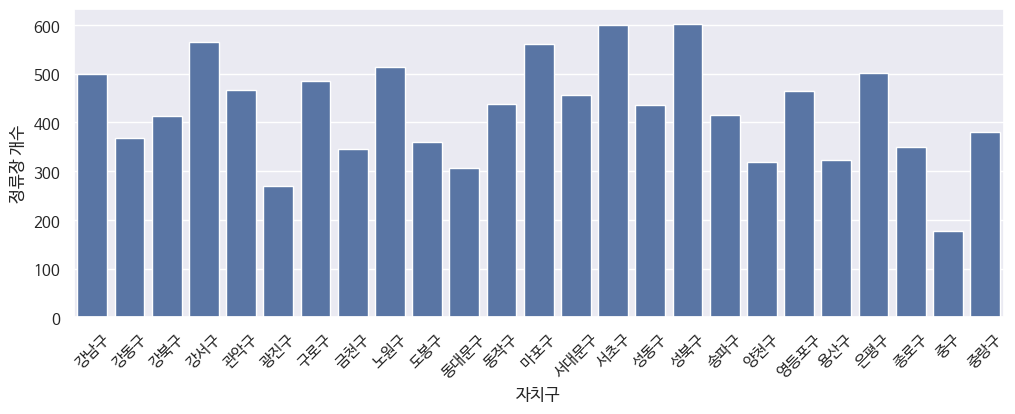

In [17]:
plt.figure(figsize=(12,4))
sns.barplot(x='자치구', y='정류장 개수', data=df)
plt.xticks(rotation=45)
plt.show()

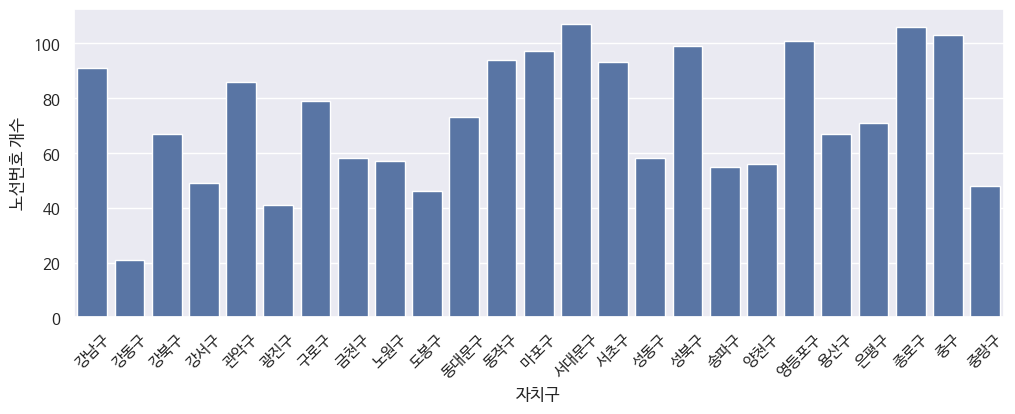

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(x='자치구', y='노선번호 개수', data=df)
plt.xticks(rotation=45)
plt.show()

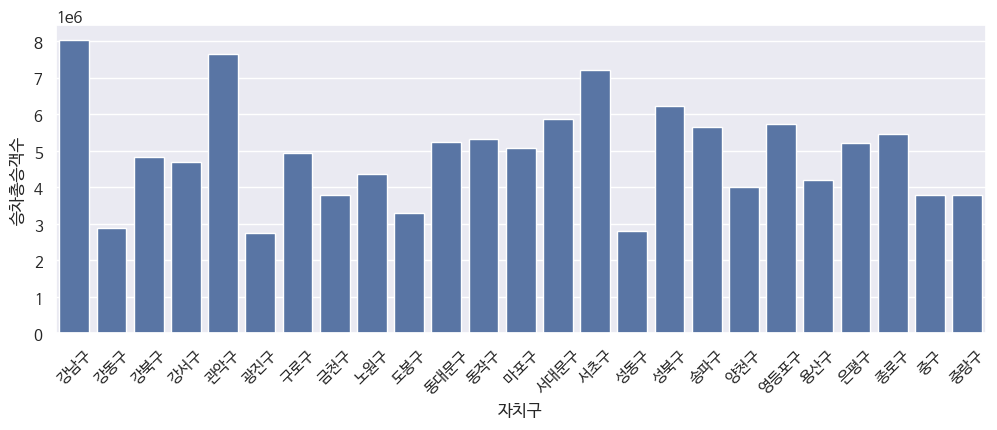

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(x='자치구', y='승차총승객수', data=df)
plt.xticks(rotation=45)
plt.show()

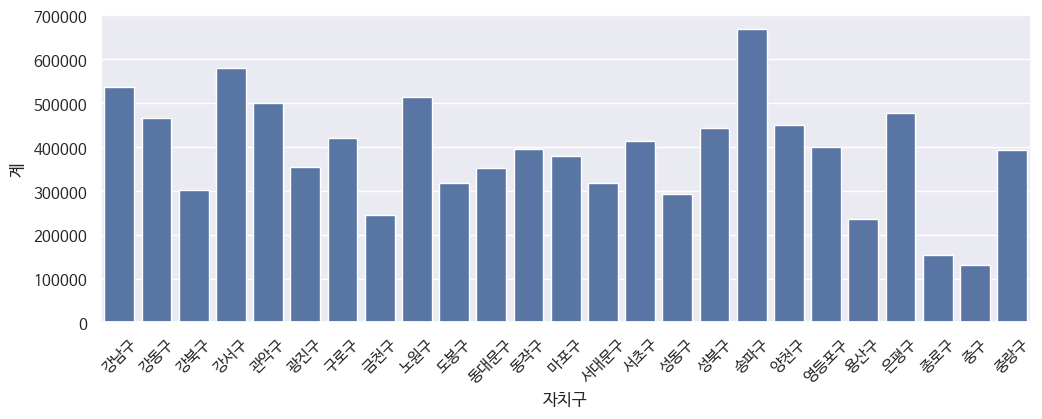

In [22]:
plt.figure(figsize=(12,4))
sns.barplot(x='자치구', y='계', data=df)
plt.xticks(rotation=45)
plt.show()

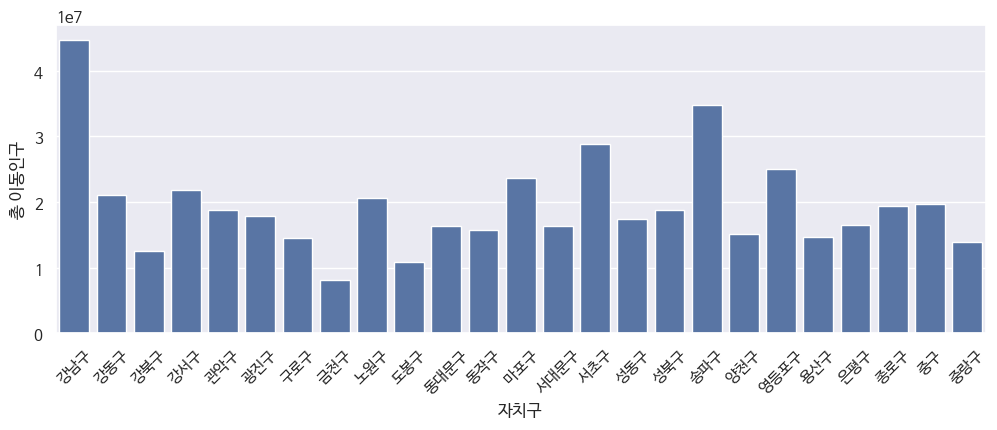

In [23]:
plt.figure(figsize=(12,4))
sns.barplot(x='자치구', y='총 이동인구', data=df)
plt.xticks(rotation=45)
plt.show()

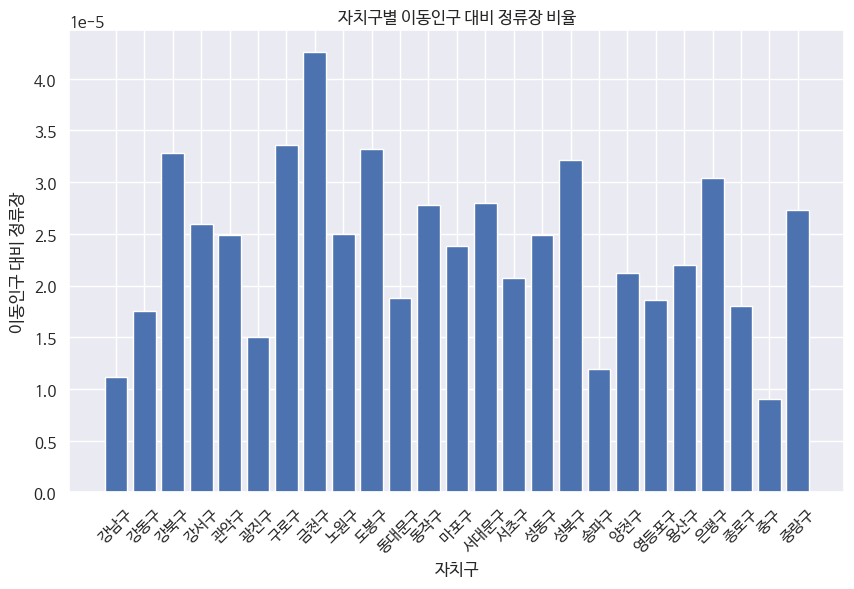

In [45]:
# 가설 1
# 자치구별 이동인구 대비 정류장 비율
df['이동인구 대비 정류장 비율'] =  df['정류장 개수'] / df['총 이동인구']

plt.figure(figsize=(10,6))
plt.bar(df['자치구'], df['이동인구 대비 정류장 비율'])
plt.xlabel('자치구')
plt.ylabel('이동인구 대비 정류장')
plt.title('자치구별 이동인구 대비 정류장 비율')
plt.xticks(rotation=45)
plt.show()

중구, 강남구, 송파구는 이동인구 대비 정류장 개수가 적어 증설 필요

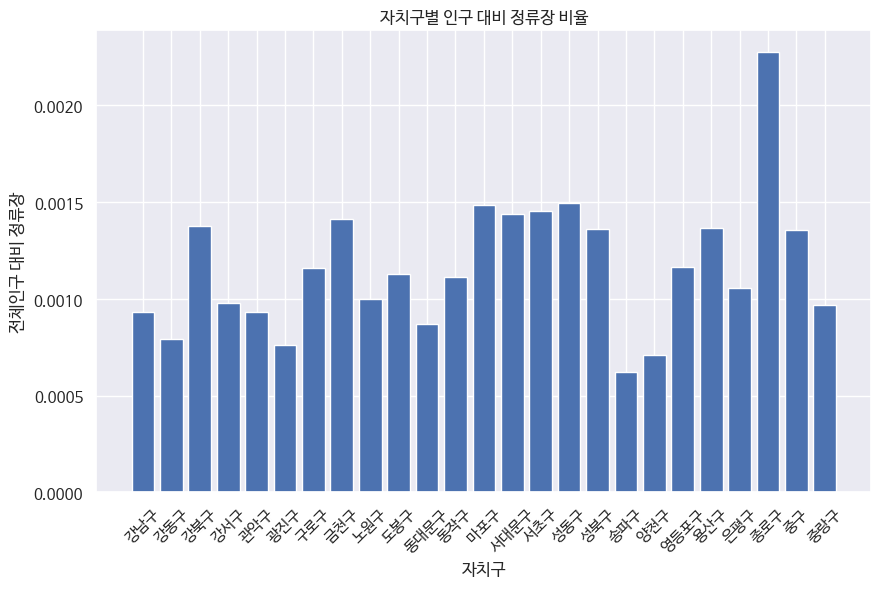

In [47]:
# 가설 2
# 자치구별 전체인구 대비 정류장 비율
df['전체인구 대비 정류장 비율'] =  df['정류장 개수'] / df['계']

plt.figure(figsize=(10,6))
plt.bar(df['자치구'], df['전체인구 대비 정류장 비율'])
plt.xlabel('자치구')
plt.ylabel('전체인구 대비 정류장')
plt.title('자치구별 인구 대비 정류장 비율')
plt.xticks(rotation=45)
plt.show()

송파구는 인구대비 정류장 비율이 적기때문에 증설 필요

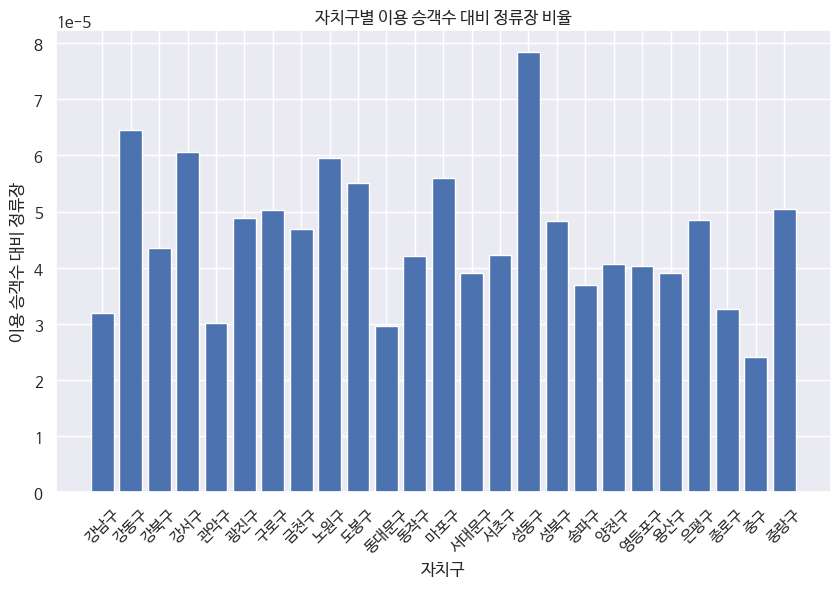

In [44]:
# 가설 3
# 자치구별 이용 승객수 대비 정류장 비율
df['이용 승객수 대비 정류장 비율'] =  df['정류장 개수'] / (df['승차총승객수']+df['하차총승객수'])

plt.figure(figsize=(10,6))
plt.bar(df['자치구'], df['이용 승객수 대비 정류장 비율'])
plt.xlabel('자치구')
plt.ylabel('이용 승객수 대비 정류장')
plt.title('자치구별 이용 승객수 대비 정류장 비율')
plt.xticks(rotation=45)
plt.show()

중구는 이용 승객수 대비 정류장 개수가 낮아 정류장 증설 필요

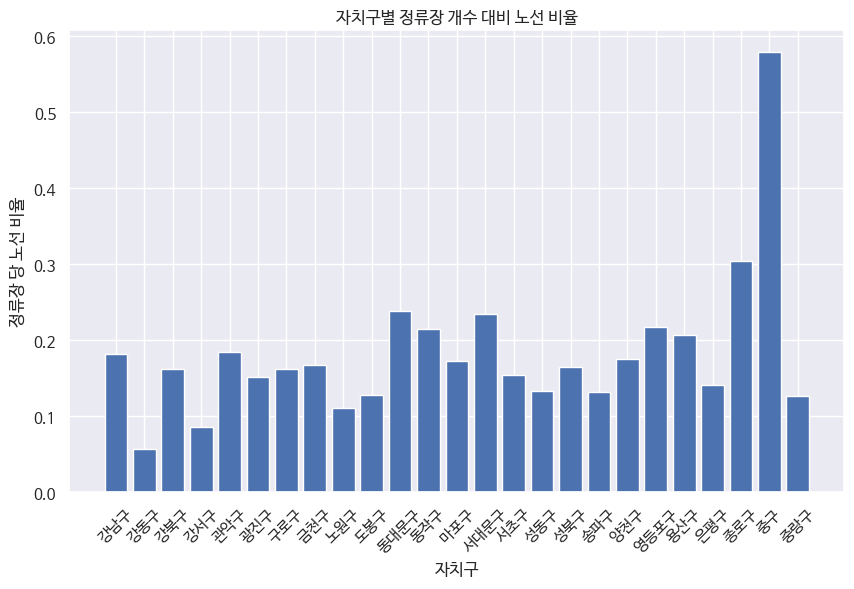

In [24]:
# 가설 4
# 자치구별 정류장 개수 대비 노선 비율
df['노선비율'] = df['노선번호 개수'] / df['정류장 개수']

plt.figure(figsize=(10,6))
plt.bar(df['자치구'], df['노선비율'])
plt.xlabel('자치구')
plt.ylabel('정류장 당 노선 비율')
plt.title('자치구별 정류장 개수 대비 노선 비율')
plt.xticks(rotation=45)
plt.show()

강동구는 정류장 대비 노선이 적기 때문에 증설이 필요함

In [48]:
# 중구와 송파구에 정류장 증설 필요